<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [16]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset in the csv file from the URL


In [4]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [5]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Descriptive Statistics and Visualizations

### For the "Median value of owner-occupied homes" provide a boxplot

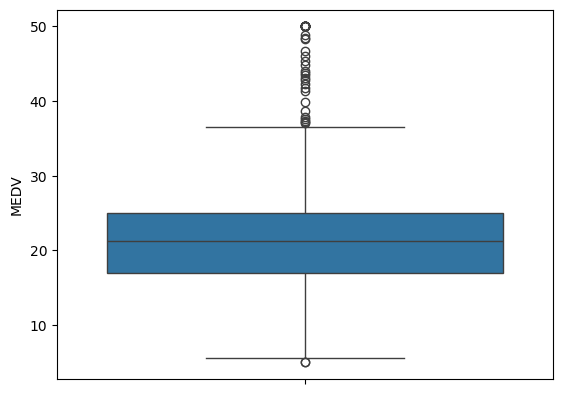

In [6]:
ax = sns.boxplot( y='MEDV', data=boston_df)
plt.show()

### Provide a  bar plot for the Charles river variable

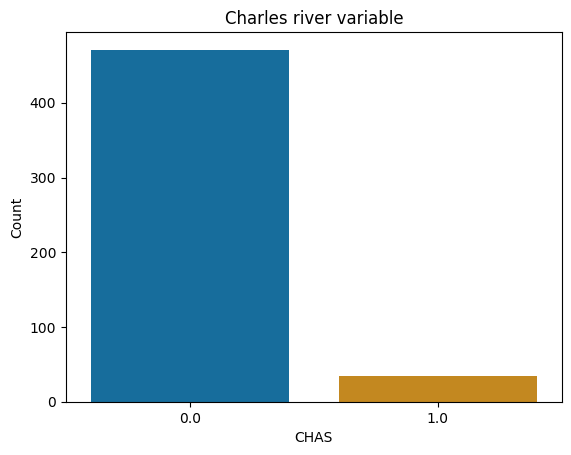

In [22]:
ax = sns.countplot(x = 'CHAS' , data=boston_df, palette="colorblind")
ax.set_title("Charles river variable") 
ax.set(xlabel="CHAS", ylabel="Count")
plt.show()

### Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [7]:
##Vamos a crear una nueva variable para la categorización
boston_df["AGE_GROUP"] = boston_df.apply(lambda x: '<= 35' if x.AGE <= 35 else
                                                                 '36-69' if x.AGE > 35 and x.AGE < 70 else
                                                                 '>= 70', axis=1)

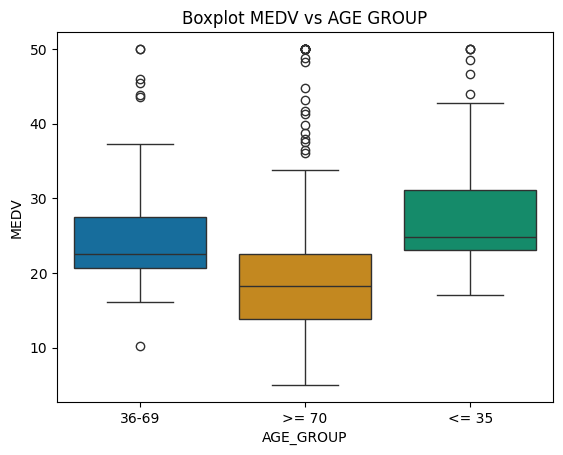

In [8]:
ax = sns.boxplot(data=boston_df, x = 'AGE_GROUP', y='MEDV', palette="colorblind")
ax.set_title("Boxplot MEDV vs AGE GROUP") 
plt.show()

### Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

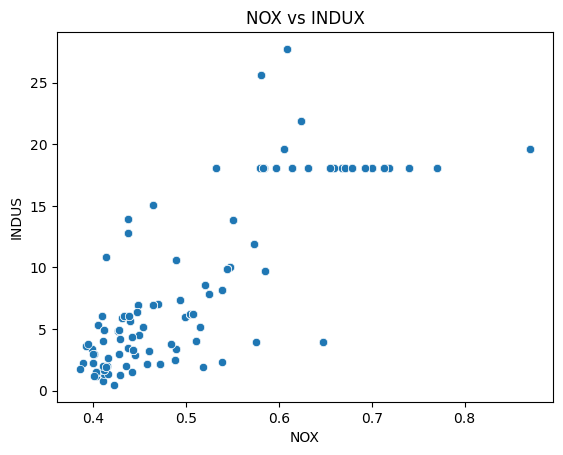

In [24]:
ax = sns.scatterplot(data=boston_df, x = 'NOX', y='INDUS', palette="colorblind")
ax.set_title("NOX vs INDUX") 
plt.show()

In [ ]:
# De manera general podemos observar que a mayor NOX, mayor INDUS

### Create a histogram for the pupil to teacher ratio variable

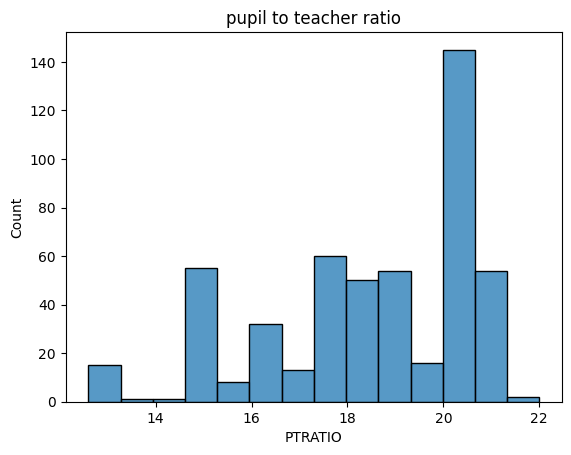

In [12]:
ax = sns.histplot(x = 'PTRATIO' , data=boston_df, palette="colorblind")
ax.set_title("pupil to teacher ratio") 
ax.set(xlabel="PTRATIO", ylabel="Count")
plt.show()

# Use the appropriate tests to answer the questions provided.

### Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in value of houses bounded by the Charles river")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in value of houses bounded by the Charles river")

[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

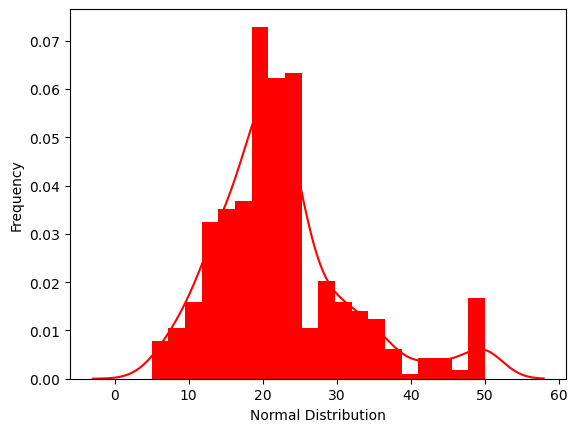

In [9]:
ax = sns.distplot(boston_df['MEDV'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
ax.set(xlabel='Normal Distribution', ylabel='Frequency')
## we can assume it is normal

In [10]:
scipy.stats.levene(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], center='mean')

# since the p-value is less than 0.05 we cannot assume equality of variance

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [11]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 0.0]['MEDV'],
                   boston_df[boston_df['CHAS'] == 1.0]['MEDV'], equal_var = False)

TtestResult(statistic=-3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

**Conclusion:** Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in median value of houses bounded by the Charles river

### Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("there is no difference in median value of houses for each proportion of owner")
*   $H\_1: µ\_1 ≠ µ\_2$ ("there is a difference in median value of houses for each proportion of owner")

In [11]:
from statsmodels.formula.api import ols
lm = ols('MEDV ~ AGE', data = boston_df).fit()
table = sm.stats.anova_lm(lm)
print(table)

             df        sum_sq      mean_sq          F        PR(>F)
AGE         1.0   6069.761065  6069.761065  83.477459  1.569982e-18
Residual  504.0  36646.534350    72.711378        NaN           NaN


Como el p-value es menor al 5%, entonces rechazamos la hipótesis nula, por lo tanto podemos decir que hay una diferencia entre las medias de los valores de la casa por cada proporción de de unidades ocupadas por los propietarios construidas antes de 1940

### Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

State the hypothesis

*   $H\_0: µ\_1 = µ\_2$ ("Nitric oxide concentration is not correlated with the proportion of non-retail business acres per town")
*   $H\_1: µ\_1 ≠ µ\_2$ ("Nitric oxide concentration is correlated with the proportion of non-retail business acres per town")

In [12]:
scipy.stats.pearsonr(boston_df["NOX"],boston_df["INDUS"])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

Como el P value es menor a 0.05 entonces rechazamos la hipótesis nula, por lo tanto existe una correlación positiva entre NOX e INDUS

### What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [ ]:
tate Hypothesis

Null Hypothesis: weighted distances to five Boston employment centres are not related to median value

Alternative Hypothesis: weighted distances to five Boston employment centres are related to median value

In [13]:
y = boston_df['MEDV']
x = boston_df['DIS']

In [14]:
x = sm.add_constant(x)
results = sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 09 May 2024   Prob (F-statistic):           1.21e-08
Time:                        10:18:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
np.sqrt(0.062)  ##Pearson Coeffiecent valuea

0.24899799195977465

In [ ]:
Observamos una R cuadrada de 0.25 lo que implica una debil correlación entre ambbas características.

In [ ]:
The square root of R-squared is 0.25, which implies weak correlation between both features